# IT8302 Applied Machine Learning - CA2 Submission - Time Series Forecasting Models
### Submitted By: Lo Ka Fai
### Student ID: 7304896V
### Submission Date: 16 Feb 2025

# PART B: STOCK PRICE FORECASTING
## Objective: 
## In this segment, we will analyse 3 different stocks (Apple, Amazon, DBS) using Time Series forecasting models to train and predict the future stock price for the next 60 days.

## Stock Dataset : The stock dataset is given (CA2-Stock-Price-Data.csv). 
## The stock dataset contains 5 years (2018-2023) of close price data for stock Apple, Amazon and DBS.

## 1. Import Libraries

In [6]:
# Check if statemodels has been installed
!pip show statsmodels

Name: statsmodels
Version: 0.14.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: C:\Users\lokf2\anaconda3\Lib\site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 


In [2]:
# For automatic ARIMA model selection in time series forecasting.
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------ --------- 2.1/2.8 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 10.8 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')


## 2. Import Dataset and Exploratory Data Analysis

In [2]:
df = pd.read_csv("CA2-Stock-Price-Data.csv")
df

,Date,Apple,Amazon,DBS
0,10/1/2018,56.814999,100.218002,25.969999
1,10/2/2018,57.320000,98.565498,25.629999
2,10/3/2018,58.017502,97.638000,25.950001
3,10/4/2018,56.997501,95.471001,25.760000
4,10/5/2018,56.072498,94.482498,25.770000
...,...,...,...,...
1252,9/22/2023,174.789993,129.119995,33.250000
1253,9/25/2023,176.080002,131.270004,33.450001
1254,9/26/2023,171.960007,125.980003,33.509998
1255,9/27/2023,170.429993,125.980003,33.430000


### 2.1 Check on dataset

### Create function "eda" to automate EDA checks

In [3]:
def eda(df):
    
    print("Perform Exploratory Data Analysis (EDA) on dataset")
    
    print("\n*** First 5 Rows ***")
    display(df.head())

    print("\n*** Last 5 Rows ***")
    display(df.tail())
    
    print("\n*** Shape of Dataset ***")
    print(df.shape)
    
    print("\n*** Info ***")
    print(df.info())

    print("\n*** Missing Values ***")
    missing_values = df.isnull().sum()
    print(missing_values)
    
    print("\n*** Statistical Summary ***")
    display(df.describe())
    
    print("\n*** Histograms ***")
    df.hist(figsize=(12,10), bins=30, edgecolor='k')
    plt.tight_layout()
    plt.show()
    
    


Perform Exploratory Data Analysis (EDA) on dataset

*** First 5 Rows ***


,Date,Apple,Amazon,DBS
0,10/1/2018,56.814999,100.218002,25.969999
1,10/2/2018,57.320000,98.565498,25.629999
2,10/3/2018,58.017502,97.638000,25.950001
3,10/4/2018,56.997501,95.471001,25.760000
4,10/5/2018,56.072498,94.482498,25.770000



*** Last 5 Rows ***


,Date,Apple,Amazon,DBS
1252,9/22/2023,174.789993,129.119995,33.250000
1253,9/25/2023,176.080002,131.270004,33.450001
1254,9/26/2023,171.960007,125.980003,33.509998
1255,9/27/2023,170.429993,125.980003,33.430000
1256,9/28/2023,170.690002,125.980003,33.500000



*** Shape of Dataset ***
(1257, 4)

*** Info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Apple   1257 non-null   float64
 2   Amazon  1257 non-null   float64
 3   DBS     1257 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.4+ KB
None

*** Missing Values ***
Date      0
Apple     0
Amazon    0
DBS       0
dtype: int64

*** Statistical Summary ***


,Apple,Amazon,DBS
count,1257.000000,1257.000000,1257.000000
mean,116.168385,124.791237,28.185863
std,46.945568,32.495925,4.738732
min,35.547501,67.197998,16.879999
25%,66.592499,93.489998,24.879999
50%,129.610001,120.970001,28.650000
75%,152.589996,158.100494,32.480000
max,196.449997,186.570496,37.250000



*** Histograms ***


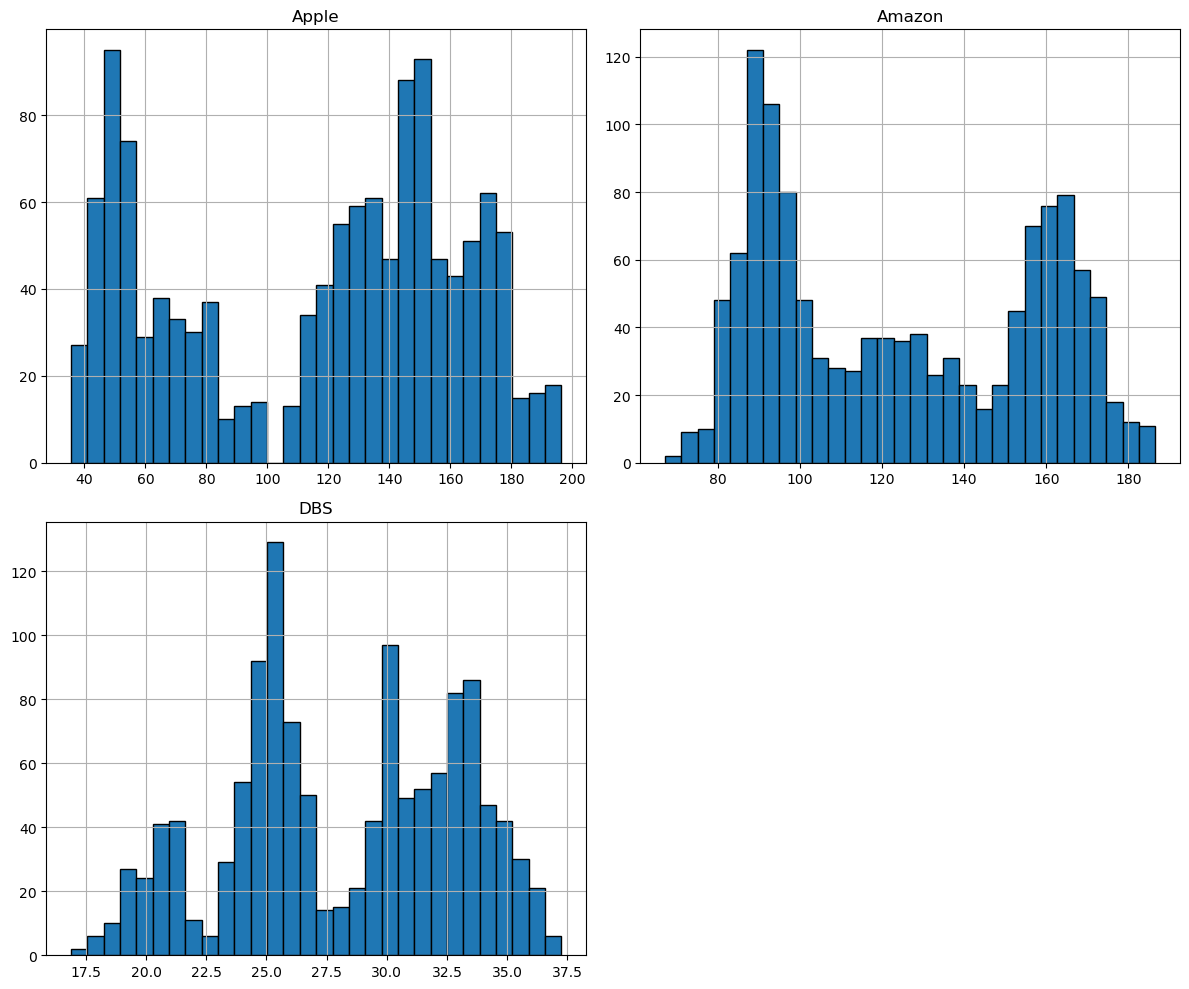

In [4]:
eda(df)

### No missing data, the data is clean and cleaning is not required.
 

## 3. Preprocess Data

### 3.1 Create 3 individual stock dataset for analysis

In [5]:
# Create separate DataFrames for each stock
df_aapl = df[['Date', 'Apple']].copy()
df_amzn = df[['Date', 'Amazon']].copy()
df_dbs = df[['Date', 'DBS']].copy()

# Show the first 5 rows of each DataFrame
print("Apple Stock Data:")
print(df_aapl.head())
print("\nAmazon Stock Data:")
print(df_amzn.head())
print("\nDBS Stock Data:")
print(df_dbs.head())

Apple Stock Data:
        Date      Apple
0  10/1/2018  56.814999
1  10/2/2018  57.320000
2  10/3/2018  58.017502
3  10/4/2018  56.997501
4  10/5/2018  56.072498

Amazon Stock Data:
        Date      Amazon
0  10/1/2018  100.218002
1  10/2/2018   98.565498
2  10/3/2018   97.638000
3  10/4/2018   95.471001
4  10/5/2018   94.482498

DBS Stock Data:
        Date        DBS
0  10/1/2018  25.969999
1  10/2/2018  25.629999
2  10/3/2018  25.950001
3  10/4/2018  25.760000
4  10/5/2018  25.770000


### 3.2 DBS - DBS stock 

In [6]:
df_dbs.head()

,Date,DBS
0,10/1/2018,25.969999
1,10/2/2018,25.629999
2,10/3/2018,25.950001
3,10/4/2018,25.760000
4,10/5/2018,25.770000


### 3.2.1 Convert Date column to datetime format and set Date column as the index for time series data analysis

In [7]:
df_dbs['Date'] = pd.to_datetime(df_dbs['Date'])
df_dbs.set_index("Date", inplace=True)

In [8]:
df_dbs.head()

,DBS
Date,
2018-10-01,25.969999
2018-10-02,25.629999
2018-10-03,25.950001
2018-10-04,25.760000
2018-10-05,25.770000


### 3.2.2 Check Stationarity

### Visual check stock price on chart

<Figure size 900x600 with 0 Axes>

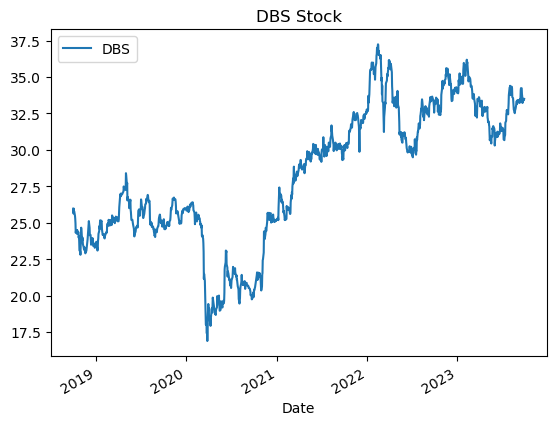

In [9]:
plt.figure(figsize=(9, 6))
df_dbs.plot()
plt.title('DBS Stock')
plt.show()

### DBS price movement does not fulfill any of the stationary series properties (mean, variance, covariance), the data does not look stationary. 

### Check with Histogram 

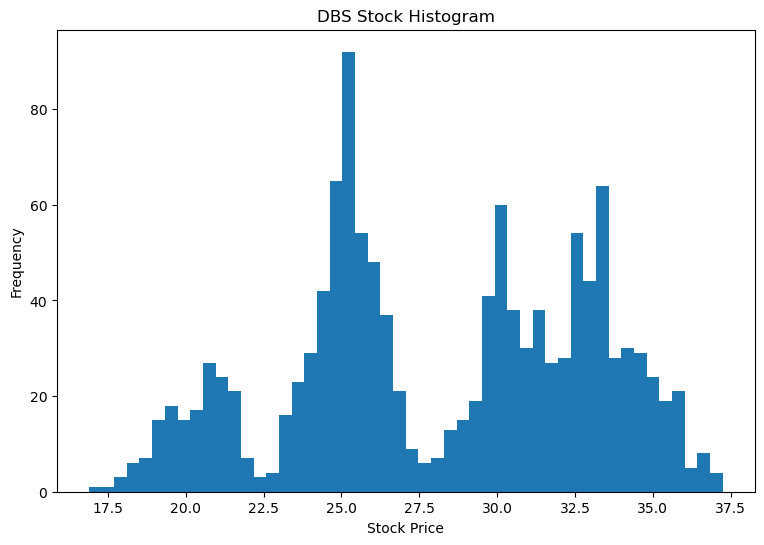

In [10]:
# Create the histogram for 'Amazon' stock data
plt.figure(figsize=(9, 6))
df_dbs['DBS'].plot(kind='hist', bins=50)
plt.title('DBS Stock Histogram')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()


### It is not a single typical bell curve, the data does not look stationary.

### Confirm with Augmented Dickey Fuller (ADF) test

In [12]:
result = adfuller(df_dbs['DBS'])

# Output the results 
print(f'DBS No of Observations: {result[3]:}')
print(f'DBS dataset p-value: {result[1]:.4f}')

DBS No of Observations: 1254
DBS dataset p-value: 0.6557


### P-value > 0.05: Fail to reject the null hypothesis (H0), the data is non-stationary.
### No of Observations means the number valid data points were used in the actual statistical test after accounting for the lags. Higher the numbers of observations used in the test, the more reliable of the test.

### 3.2.3 Differencing (Make the data stationary)

DBS before differencing p-value: 0.655680
DBS after differencing p-value: 0.000000
DBS after differencing twice p-value: 0.000000




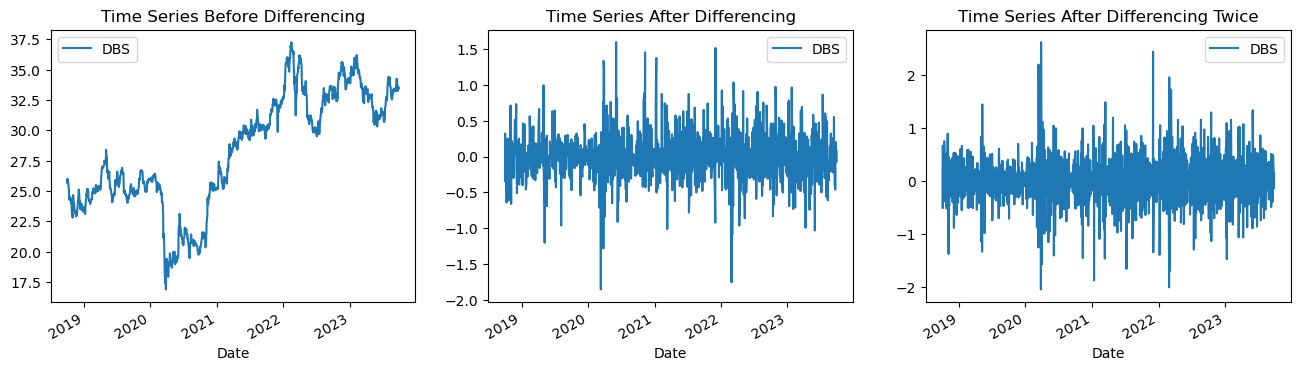

In [13]:
# Perform differencing operations
df_dbs_diff = diff(df_dbs['DBS'], k_diff=1)  # First differencing
df_dbs_diff2 = diff(df_dbs_diff, k_diff=1)  # Second differencing

# Apply ADF test to check on seasonality on the original and differenced series
result1 = adfuller(df_dbs['DBS'])  # Original series
result2 = adfuller(df_dbs_diff.dropna())  # Differenced once (drop NaN)
result3 = adfuller(df_dbs_diff2.dropna())  # Differenced twice (drop NaN)

# Output the results
print('DBS before differencing p-value: %f' % result1[1])
print('DBS after differencing p-value: %f' % result2[1])
print('DBS after differencing twice p-value: %f' % result3[1])

print("\n")
      
# Plot the time series before and after differencing
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

df_dbs['DBS'].plot(ax=ax[0])
df_dbs_diff.plot(ax=ax[1])
df_dbs_diff2.plot(ax=ax[2])

ax[0].set_title('Time Series Before Differencing')
ax[1].set_title('Time Series After Differencing')
ax[2].set_title('Time Series After Differencing Twice')

# Add legend to each subplot
ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()

### From the above results, first differencing (p-value=0.0000) is sufficient to make the DBS time series data stationary.

### 3.2.4 Check Seasonality - Time Series Decomposition 
### Identify the properties of Time Series Components - (Trend, Seasonality, Random component)

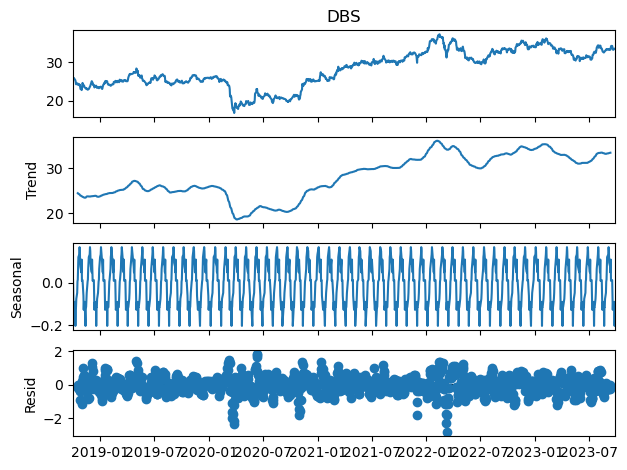

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_dbs['DBS'], model='additive', period=24)  # Assuming monthly seasonality
result.plot()
plt.show()


### From the seasonal components, the time series data has seasonality. We shall use SARIMA model for training and forecasting.

### 3.2.5 ACF and PACF plot
### Use ACF and PACF plots to determine (p, d, q) and (P, D, Q, S)
### (Note: We use auto_arima for Hyperparameters Tuning later to search for the best (p, d, q) and (P, D, Q, S) instead.)

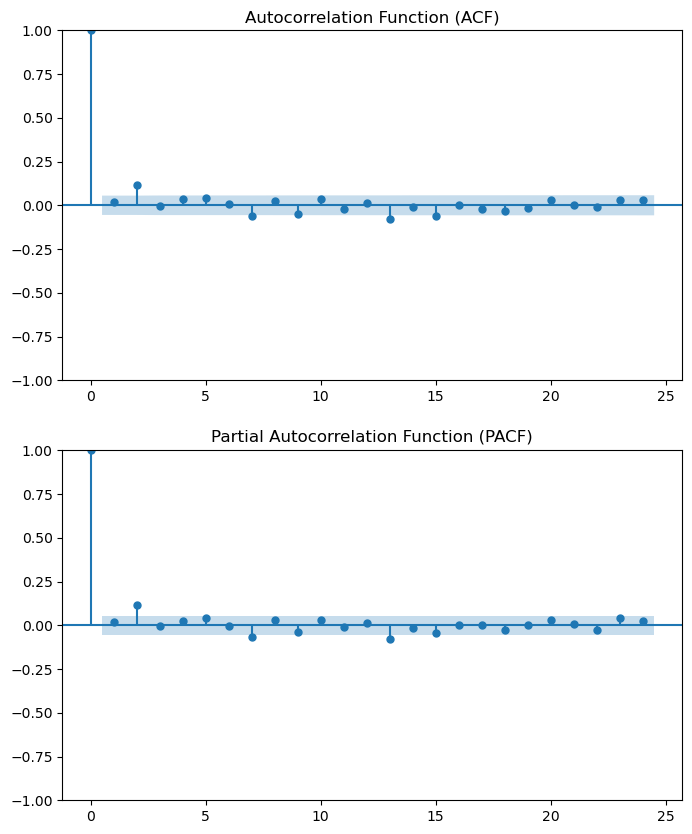

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot ACF and PACF to determine appropriate ARIMA and seasonal parameters
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_acf(df_dbs_diff.dropna(), lags=24, ax=axes[0])   # ACF helps in determining the q parameter in ARIMA or SARIMA model
plot_pacf(df_dbs_diff.dropna(), lags=24, ax=axes[1])  # PACF helps in determining the p parameter in ARIMA or SARIMA model
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

## 4. Model Building

### 4.1 Split Data (Train and Test)

In [28]:
# Split data into train and test (80-20 split)
train_size = int(len(df_dbs) * 0.8)
train, test = df_dbs['DBS'][:train_size], df_dbs['DBS'][train_size:]

In [29]:
train

Date
2018-10-01    25.969999
2018-10-02    25.629999
2018-10-03    25.950001
2018-10-04    25.760000
2018-10-05    25.770000
                ...    
2022-09-21    33.660000
2022-09-22    33.529999
2022-09-23    33.520000
2022-09-26    33.400002
2022-09-27    33.189999
Name: DBS, Length: 1005, dtype: float64

In [30]:
test

Date
2022-09-28    33.020000
2022-09-29    32.560001
2022-09-30    32.930000
2022-10-03    33.389999
2022-10-04    33.150002
                ...    
2023-09-22    33.250000
2023-09-25    33.450001
2023-09-26    33.509998
2023-09-27    33.430000
2023-09-28    33.500000
Name: DBS, Length: 252, dtype: float64

### 4.2 Model Selection - Time Series Forecasting Model (SARIMA)

### 4.2.1 Hyperparameter Tuning with auto_arima
### To search for the best parameters for ARIMA(p,d,q) and SARIMA(P,D,Q,s) model

### Simple hyperparameter tuning

In [31]:
# Fit ARIMA or SARIMA model automatically
model = pm.auto_arima(df_dbs['DBS'], seasonal=True, m=24, stepwise=True, trace=True)

# Print the summary of the model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=791.987, Time=5.84 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=801.323, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=803.942, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=803.982, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=799.732, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=790.843, Time=5.46 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=789.345, Time=1.37 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=790.871, Time=5.41 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=790.658, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=790.135, Time=0.78 sec
 ARIMA(3,1,2)(0,0,0)[24] intercept   : AIC=789.510, Time=1.82 sec
 ARIMA(2,1,3)(0,0,0)[24] intercept   : AIC=793.205, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=797.938, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[24] intercept   : AIC=792.662, Time=1.41 sec
 ARIMA(3,1,1)(0,0,0)[24] intercep

### Comprehensive hyperparameter tuning

In [32]:
model = pm.auto_arima(df_dbs['DBS'], 
                      # p and q values for the non-seasonal part of the model
                      start_p=1,                  # Starting value of p for ARIMA part (auto starts searching from this value)
                      start_q=1,                  # Starting value of q for ARIMA part (auto starts searching from this value)
                      max_p=2,                    # Maximum value of p for ARIMA part to search up to (controls the AR order)
                      max_q=2,                    # Maximum value of q for ARIMA part to search up to (controls the MA order)
                      
                      # P and Q values for the seasonal part of the model
                      start_P=1,                  # Starting value of P for seasonal AR part (auto starts searching from this value)
                      start_Q=1,                  # Starting value of Q for seasonal MA part (auto starts searching from this value)
                      max_P=2,                    # Maximum value of P for seasonal AR part to search up to (controls seasonal AR order)
                      max_Q=2,                    # Maximum value of Q for seasonal MA part to search up to (controls seasonal MA order)
                      
                      # Stationarity testing and differencing options
                      test="adf",                 # Statistical test to use for stationarity
                      d=1,                        # Non-seasonal differencing order (d=1 means first-order differencing to achieve stationarity)
                      D=1,                        # Seasonal differencing order (D=1 means first-order seasonal differencing to remove seasonal trends)
                      
                      # Seasonal settings
                      seasonal=True,              # Enable seasonal differencing and seasonal ARMA terms
                      m=24,                       # Seasonal period (m=24 means monthly seasonality with daily data with 24 trading days in a month)
                      
                      # Search strategy and output details
                      stepwise=True,              # Stepwise search for ARIMA parameters (tries a series of ARIMA models with different parameters and picks the best)
                      trace=True)                 # Display a trace of the search process to show progress and parameters being tried

# Print the summary of the model with the best parameters found
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[24]             : AIC=inf, Time=10.19 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=1607.873, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=1301.209, Time=1.37 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=7.24 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=1609.856, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=1143.938, Time=3.37 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=31.68 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=14.25 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=1142.588, Time=2.47 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=1299.288, Time=0.80 sec
 ARIMA(0,1,0)(2,1,1)[24]             : AIC=inf, Time=18.62 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=8.44 sec
 ARIMA(0,1,1)(2,1,0)[24]             : AIC=1144.052, Time=4.23 sec
 ARIMA(1,1,1)(2,1,0)[24]             : AIC=1140.439, Time=9.77 sec
 ARIMA(1,1,1)(1,1,0)[24]             : AIC=12

### 4.3 Model Training
### Train the model with the best ARIMA(p, d, q) & SARIMA(P, D, Q, s) parameters

### sarima_model2 - Apply best (p,d,q) and (P,D,Q,S) from Comprehensive hyperparameter tuning results

In [59]:
# Fit SARIMA model
# s=24 for 24 days seasonality cycle 
# Best model:  ARIMA(2,1,0)(2,1,0)[24]  
# AIC:         1131.916

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df_dbs['DBS'], 
                       order=(2, 1, 0),               # ARIMA(p, d, q) parameters
                       seasonal_order=(2, 1, 0, 24),  # Seasonal (P, D, Q, s)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
                       
# Fit the model
sarima_model2 = sarima_model.fit()

# Print model summary
print(sarima_model2.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                                DBS   No. Observations:                 1257
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 24)   Log Likelihood                -537.325
Date:                            Wed, 12 Feb 2025   AIC                           1084.651
Time:                                    17:55:47   BIC                           1110.026
Sample:                                         0   HQIC                          1094.216
                                           - 1257                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0122      0.026      0.474      0.635      -0.038       0.063
ar.L2          0.1060      0.026   

### sarima_model1 - Apply best (p,d,q) and (P,D,Q,S) from Simple hyperparameter tuning results

In [54]:
# Best model:   ARIMA(3,1,1)(0,0,0)[24] 
# AIC:         6198.146
# Model:       SARIMAX(3, 1, 1)

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df_dbs['DBS'], 
                       order=(3, 1, 1),               # ARIMA(p, d, q) parameters
                       seasonal_order=(3, 1, 1, 24),  # Seasonal (P, D, Q, s)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
                       
# Fit the model
sarima_model1 = sarima_model.fit() 

# Print model summary
print(sarima_model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                DBS   No. Observations:                 1257
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 24)   Log Likelihood                -401.580
Date:                            Wed, 12 Feb 2025   AIC                            821.161
Time:                                    17:48:57   BIC                            866.643
Sample:                                         0   HQIC                           838.324
                                           - 1257                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -7.273e-05      0.688     -0.000      1.000      -1.348       1.348
ar.L2          0.1155      0.025   

## 5. Forecasting (To forecast DBS stock price in the next 60 days)

### 5.1 Apply sarima_model1 (Simple) for forecasting
### Best model: ARIMA(3,1,1)(0,0,0)[24], SARIMAX(3, 1, 1)
### AIC: 821.161

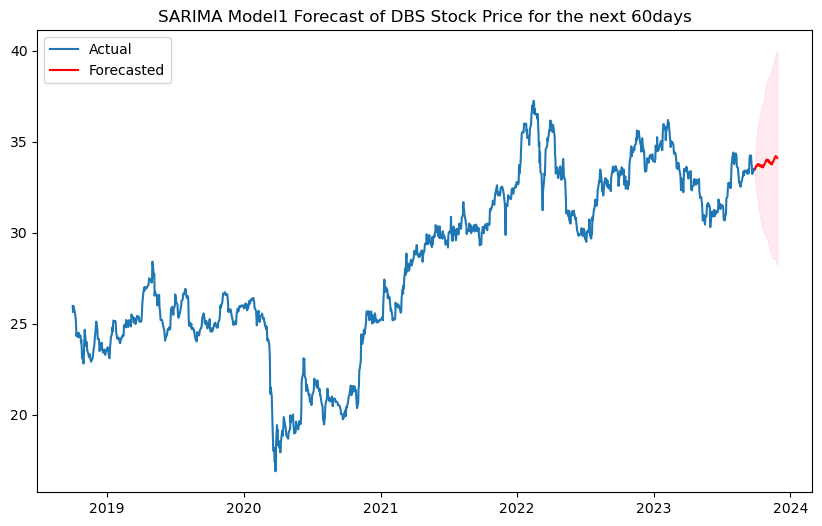

In [37]:
# Forecasting the next 60 days

forecast = sarima_model1.get_forecast(steps=60) # alpha=0.05 → 95% confidence interval (default)
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df_dbs.index, df_dbs['DBS'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted', color='red')
plt.fill_between(forecast_index, forecast.conf_int()['lower DBS'], forecast.conf_int()['upper DBS'], color='pink', alpha=0.3)
plt.title('SARIMA Model1 Forecast of DBS Stock Price for the next 60days')
plt.legend()
plt.show()

In [38]:
# Extract confidence intervals
conf_int = forecast.conf_int()

# Get the min and max forecasted price range
forecast_min = conf_int["lower DBS"].min()
forecast_max = conf_int["upper DBS"].max()

print(f"Forecasted Price Range for Next 60 Days: ${forecast_min:.2f} - ${forecast_max:.2f}")

Forecasted Price Range for Next 60 Days: $28.24 - $39.97


### 5.2 Apply sarima_model2 (Comprehensive) for forecasting
### Best model: ARIMA(2,1,0)(2,1,0)[24] 
### AIC: 1084.651

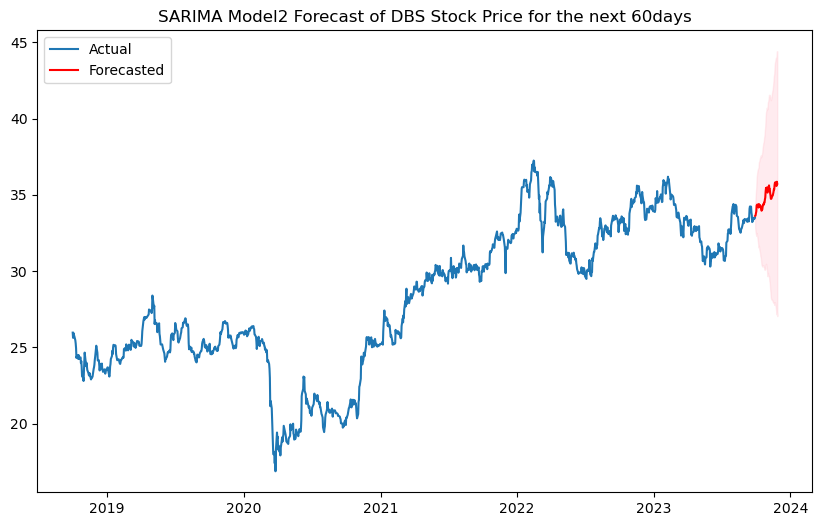

In [39]:
# Forecasting the next 60 days
forecast = sarima_model2.get_forecast(steps=60)  # alpha=0.05 → 95% confidence interval (default)
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df_dbs.index, df_dbs['DBS'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted', color='red')
plt.fill_between(forecast_index, forecast.conf_int()['lower DBS'], forecast.conf_int()['upper DBS'], color='pink', alpha=0.3)
plt.title('SARIMA Model2 Forecast of DBS Stock Price for the next 60days')
plt.legend()
plt.show()

In [40]:
# Extract confidence intervals
conf_int = forecast.conf_int()

# Get the min and max forecasted price range
forecast_min = conf_int["lower DBS"].min()
forecast_max = conf_int["upper DBS"].max()

print(f"Forecasted Price Range for Next 60 Days: ${forecast_min:.2f} - ${forecast_max:.2f}")

Forecasted Price Range for Next 60 Days: $27.05 - $44.41


### Forecasting results using the 2 SARIMA model:

### Model-1 (Simple): Predicts an upwnward trend in stock prices with some volatility, forecasting a price range between 28.24 and 39.97 over the next 60 days.
### Model-2 (Comprehensive): Anticipates an upward trend as well some volatility, projecting a price range between 27.05 to 44.41 over the same period, slightly wider than Model-1.
### Both models have 95% confidence that the forecasted prices will fall within the pink zone.

### 5.3 Apply arima_model for forecasting using arima results from sarima_model2
### Best model: ARIMA(2,1,0)(2,1,0)[24] 
### AIC: 1084.651

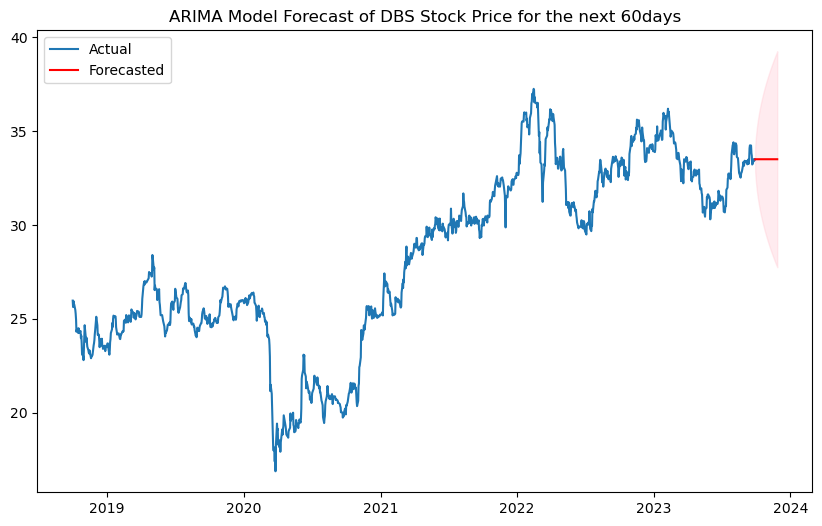

In [62]:
# Forecasting the next 60 days
# Fit ARIMA(2,1,0) model
arima_model = ARIMA(df_dbs['DBS'], order=(2, 1, 0)).fit()

forecast = arima_model.get_forecast(steps=60) # alpha=0.05 → 95% confidence interval (default)

forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df_dbs.index, df_dbs['DBS'], label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted', color='red')
plt.fill_between(forecast_index, forecast.conf_int()['lower DBS'], forecast.conf_int()['upper DBS'], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast of DBS Stock Price for the next 60days')
plt.legend()
plt.show()

In [44]:
# Extract confidence intervals
conf_int = forecast.conf_int()

# Get the min and max forecasted price range
forecast_min = conf_int["lower DBS"].min()
forecast_max = conf_int["upper DBS"].max()

print(f"Forecasted Price Range for Next 60 Days: ${forecast_min:.2f} - ${forecast_max:.2f}")

Forecasted Price Range for Next 60 Days: $27.75 - $39.25


### The ARIMA model forecasted a flat price movement for the stock in the next 60 trading days.
### ARIMA model may not be suitable for forecasting seasonal data and but it works best for non-seasonal data.

### 5.4 Apply sarima_model1 to forecast the actual test data

### Re-train sarima_model1 with the best model-1 parameters on Train data only

In [52]:
# Train SARIMA Model with train data only
sarima_model11 = SARIMAX(train, 
                        order=(3, 1, 1), 
                        seasonal_order=(3, 1, 1, 24)).fit()

### Forecast and plot

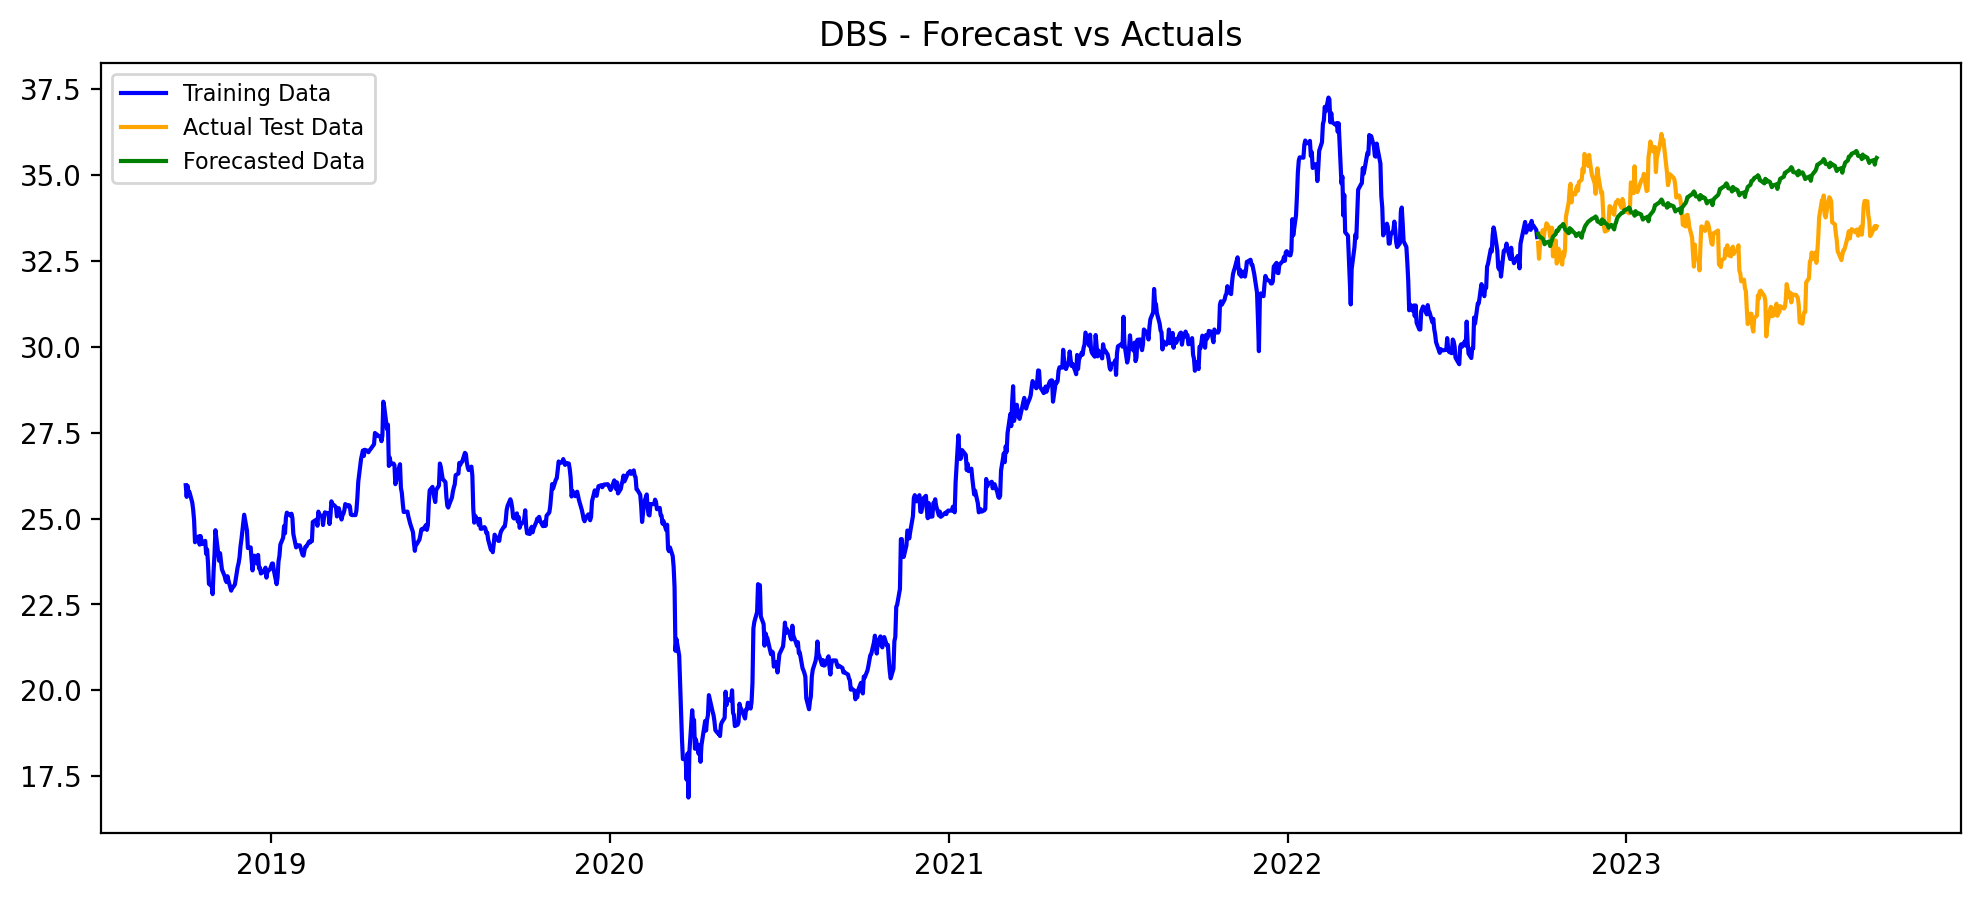

In [53]:
# Generate forecast
forecast_result = sarima_model11.get_forecast(steps=len(test), alpha=0.05)

# Extract forecasted values and confidence intervals
fc_series = forecast_result.predicted_mean
fc_series.index = test.index  # Align forecast with actual test index
conf = forecast_result.conf_int()

lower_series = pd.Series(conf["lower DBS"], index=test.index)
upper_series = pd.Series(conf["upper DBS"], index=test.index)

# Plot results
plt.figure(figsize=(12,5), dpi=200)
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Actual Test Data', color='orange')
plt.plot(fc_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, lower_series, upper_series, color='pink', alpha=0.15)

plt.title('DBS - Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### sarima_model1(Simple) predicts an upward trend in prices for the test data while actual test data is on sideway move.

## 6. Model Evaluation - Mean Absolute Percentage Error (MAPE)

### 6.1 Simple Model-1 (sarima_model1)

In [57]:
# Get predictions
pred = sarima_model1.get_prediction(start='2018-10-01', end='2023-09-28').predicted_mean

# Ensure indices match for MAPE calculation
train_pred = pred.loc[train.index]
test_pred = pred.loc[test.index]

# To evaluate the model
from sklearn.metrics import mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(train, train_pred)
mape_test = mean_absolute_percentage_error(test, test_pred)

print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 1.14%
Model Mean Absolute Percentage Error on testing data is 0.74%


### 6.2 Comprehensive Model-2 (sarima_model2)

In [60]:
# Get predictions
pred = sarima_model2.get_prediction(start='2018-10-01', end='2023-09-28').predicted_mean

# Ensure indices match for MAPE calculation
train_pred = pred.loc[train.index]
test_pred = pred.loc[test.index]

# To evaluate the model
from sklearn.metrics import mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(train, train_pred)
mape_test = mean_absolute_percentage_error(test, test_pred)

print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 1.28%
Model Mean Absolute Percentage Error on testing data is 0.87%


### 6.3 ARIMA Model (arima_model)

In [61]:
# Get predictions
pred = arima_model.get_prediction(start='2018-10-01', end='2023-09-28').predicted_mean

# Ensure indices match for MAPE calculation
train_pred = pred.loc[train.index]
test_pred = pred.loc[test.index]

# To evaluate the model
from sklearn.metrics import mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(train, train_pred)
mape_test = mean_absolute_percentage_error(test, test_pred)

print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 1.01%
Model Mean Absolute Percentage Error on testing data is 0.73%


### Verdict:

### Among the time series forecasting models tested in this assignment, the ARIMA model performs the best in terms of prediction accuracy based on the MAPE metric, achieving the lowest MAPE on both the training and testing data. 
### However, the ARIMA model may not be suitable for forecasting the stock data in this assignment, as the data exhibits seasonality, which ARIMA does not account for effectively.
### ARIMA model forecasted a horizontal price line which is unrealistic.
### Therefore, the best forecasting model is SARIMA_Model1 (Simple verison).


## 7. Model improvement

### Area for model improvement:
### 1. Further optimize ARIMA and SARIMA parameters for better model perofrmance. Different algorithm (ARIMA or SARIMA) and mdoel parameters (p,d,q, P,D,Q,S) work well with individual stock.
### 2. Employ more than one performance metrics for comparison, eg RMSE, R² Score.
### 3. Incorporate Technical Indicators (TA) like RSI, MACD, and Moving Averages into model training, eg use SARIMAX.
### 4. Apply TA Parameters in LSTM (Deep Learning Model).
### 5. Apply hybrid models , eg ARIMA + LSTM for better forecasting performance.
### 6. Explore more Time Series model for comparison, eg Random Forest, XGBoost.
